# Preparing Time Series from Wide-Form Data

# Task:

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
#import tick customization tools
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
# set random seed
SEED = 321
np.random.seed(SEED)

# Part 1:
- First, you will prepare the dataset for time series analysis:
 - Load in the Zillow Home Value Index dataframe.
   - Note: it is a large file and may take a minute to load.
 - Filter the 4 largest cities into a new dataframe.
   - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
     - Therefore the 4 largest cities would have rank values of [0,1,2,3]
 - Melt the data to long-form and prepare it for time series analysis.
   - Convert the melted dates into datetime datatype.
   - Make the datetime column the index.
 - Resample the dataframe as monthly frequency, grouped by City.

### Load the data

In [2]:
# Load in the zillow data
zillow = pd.read_csv('Data/zillow_home_data.csv')
zillow.info()
zillow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Filter the 4 largest cities into a new dataframe

In [3]:
large_cities = zillow.loc[:3].copy()
large_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis:

In [4]:
# Display all column names
large_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
# Keep all neccessary rows
melted = pd.melt(large_cities.drop(columns=['RegionID', 'SizeRank']),
                 id_vars=['RegionName', 'RegionType', 'StateName',
                          'State', 'Metro', 'CountyName'],
                           value_name='HomeValue', var_name="Date")
melted

,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...
1087,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


### Convert the melted dates into datetime datatype

In [6]:
# Convert 'Date' column to datetime
melted['Date'] = pd.to_datetime(melted['Date'])
# Confirm results
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   RegionType  1092 non-null   object        
 2   StateName   1092 non-null   object        
 3   State       1092 non-null   object        
 4   Metro       1092 non-null   object        
 5   CountyName  1092 non-null   object        
 6   Date        1092 non-null   datetime64[ns]
 7   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 68.4+ KB


### Make the datetime column the index

In [7]:
melted = melted.set_index("Date")
melted.head(3)

,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,
2000-01-31,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0


## Resample the dataframe as monthly frequency, grouped by City

In [8]:
melted['RegionName'].nunique()

4

In [9]:
zillow_ts = melted.groupby('RegionName').resample("MS").sum()
zillow_ts

C:\Users\jalic\AppData\Local\Temp\ipykernel_19660\1975783204.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zillow_ts = melted.groupby('RegionName').resample("MS").sum()


HomeValue
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

In [10]:
# Check index of new df
zillow_ts.head().index

MultiIndex([('Chicago', '2000-01-01'),
            ('Chicago', '2000-02-01'),
            ('Chicago', '2000-03-01'),
            ('Chicago', '2000-04-01'),
            ('Chicago', '2000-05-01')],
           names=['RegionName', 'Date'])

# Part 2

- Once you've prepared the dataframe with the time series data for the 4 largest cities:
 - Plot the home values for all 4 cities. (Hint: use unstack)
   - Make sure to add a title and axis labels.
   - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.
     
     
 - Answer the following 2 questions using pandas:
   - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
     - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.
     
    - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
     - Hint: you can use .diff() to calculate the change in values

## Plot the home values for all 4 cities

In [11]:
# Level 0 is 'RegionName'
zillow_ts.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [12]:
# Level 1 is 'Date'
zillow_ts.index.get_level_values(1)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [13]:
# Unstack 'RegionName' index for plotting
unstacked = zillow_ts.unstack(level=0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
## Customization Options
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context("talk", font_scale=0.9)

In [20]:
pd.plotting.plot_params = {'x_compat': True}

In [21]:
# Function used to plot y-axis values
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

In [22]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor x-axis ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ## customize major x-axis ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    # Customize major y-axis ticks
    ax.yaxis.set_major_formatter(fmt_thous)

    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

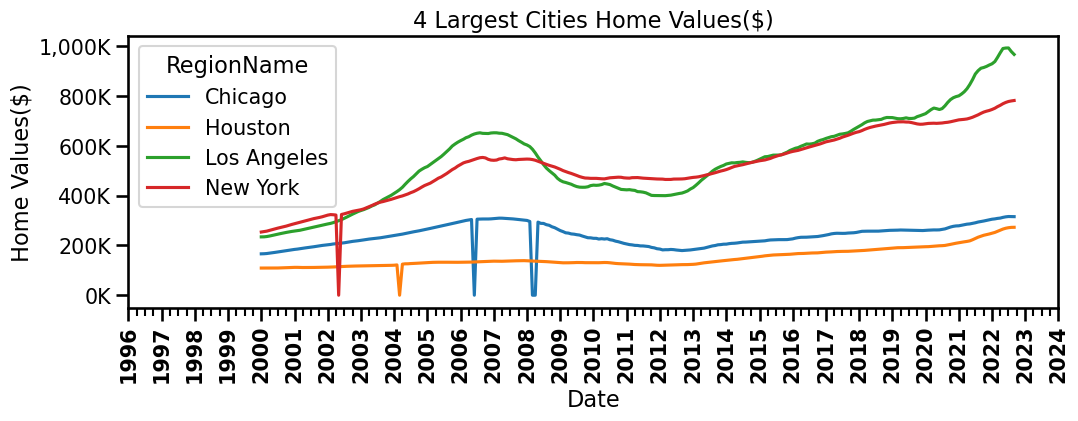

In [23]:
#ax = unstacked['HomeValue'].plot(title='4 Largest Cities Home Values($)', ylabel='Home Values($)')
#format_xdates(ax);

In [33]:
question_2 = unstacked.loc['2000':'2007']
question_2

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2007-08-01  306281.0  137931.0    633784.0  544485.0
2007-09-01  304921.0  138179.0    627838.0  543781.0
2007-10-01  303890.0  138449.0    620606.0  544998.0
2007-11-01  302715.0  138636.0    614172.0  545412.0
2007-12-01  301135.0  138802.0    607386.0  546253.0

[96 rows x 4 columns]

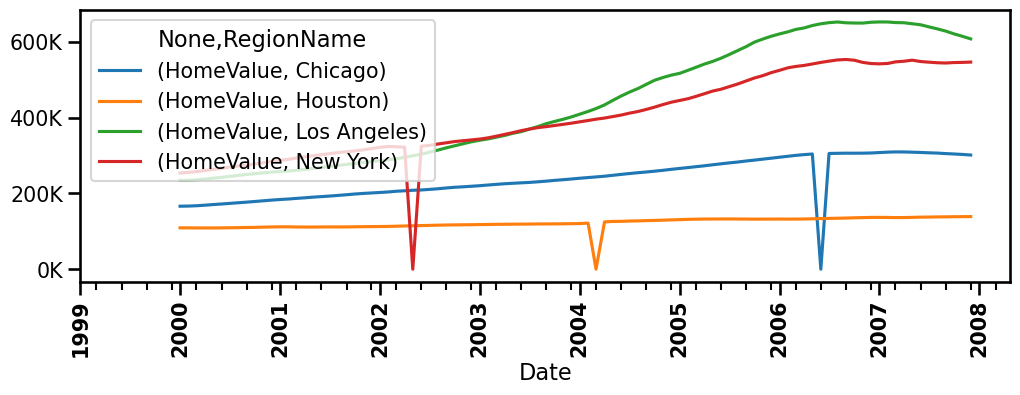

In [34]:
ax_2 = question_2.plot()
format_xdates(ax_2);